# Ward-Tordai Model Testing Notebook

This notebook is used for testing the Ward-Tordai model implementation and the plotting/fitting functionality.

In [23]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt
import plotting_and_fitting as pf
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

## Generate Sample Data

Generate synthetic surface tension data for testing purposes.

In [24]:
# Generate sample time data (in seconds)
time = np.linspace(0.1, 100, 50)

# Generate sample surface tension data (in mN/m)
# Simulating a typical dynamic surface tension curve
gamma_0 = 72.0  # Initial surface tension (water)
gamma_eq = 40.0  # Equilibrium surface tension
k = 0.1  # Rate constant

surface_tension = gamma_eq + (gamma_0 - gamma_eq) * np.exp(-k * np.sqrt(time))

# Add some noise to make it realistic
noise = np.random.normal(0, 0.5, len(time))
surface_tension_noisy = surface_tension + noise

print(f"Time range: {time[0]:.2f} - {time[-1]:.2f} s")
print(f"Surface tension range: {surface_tension_noisy.min():.2f} - {surface_tension_noisy.max():.2f} mN/m")

Time range: 0.10 - 100.00 s
Surface tension range: 50.96 - 71.90 mN/m


## Plot Sample Data

Visualize the generated data using the plotting functions.

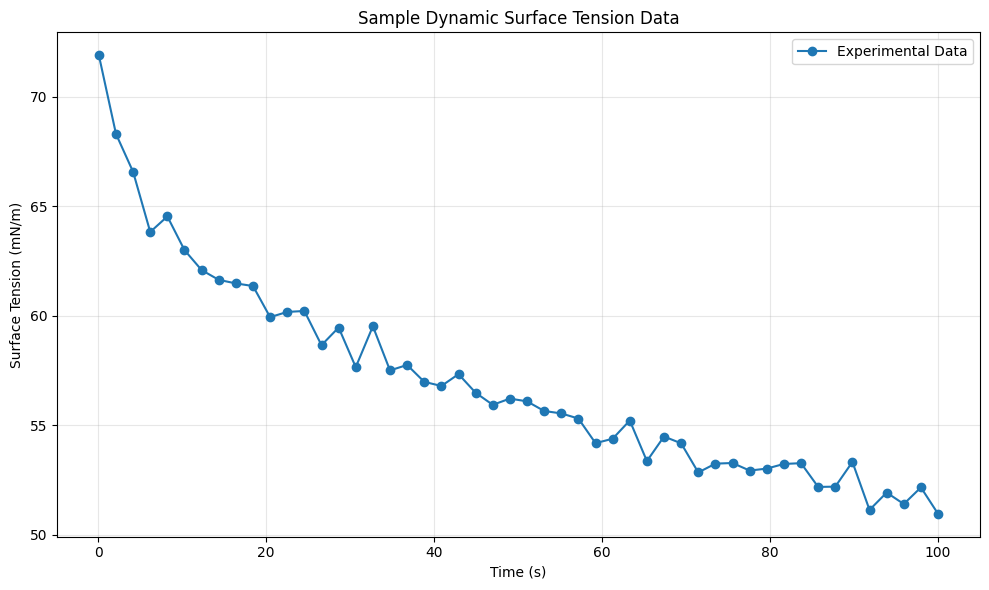

In [25]:
# Plot the sample data
pf.plot_surface_tension_vs_time(time, surface_tension_noisy, 
                                 title="Sample Dynamic Surface Tension Data")

## Test Model Fitting

Fit a model to the data and visualize the results.

In [26]:
# Define a simple model function
def simple_model(t, gamma_eq, gamma_0, k):
    return gamma_eq + (gamma_0 - gamma_eq) * np.exp(-k * np.sqrt(t))

# Initial parameter guesses
initial_params = [45.0, 70.0, 0.05]

# Fit the model
popt, pcov = pf.fit_model(time, surface_tension_noisy, simple_model, initial_params)

print(f"Fitted parameters:")
print(f"  gamma_eq = {popt[0]:.2f} mN/m")
print(f"  gamma_0 = {popt[1]:.2f} mN/m")
print(f"  k = {popt[2]:.4f}")

# Generate fitted data
fitted_surface_tension = simple_model(time, *popt)

Fitted parameters:
  gamma_eq = 38.93 mN/m
  gamma_0 = 72.40 mN/m
  k = 0.0971


## Visualize Fit Results

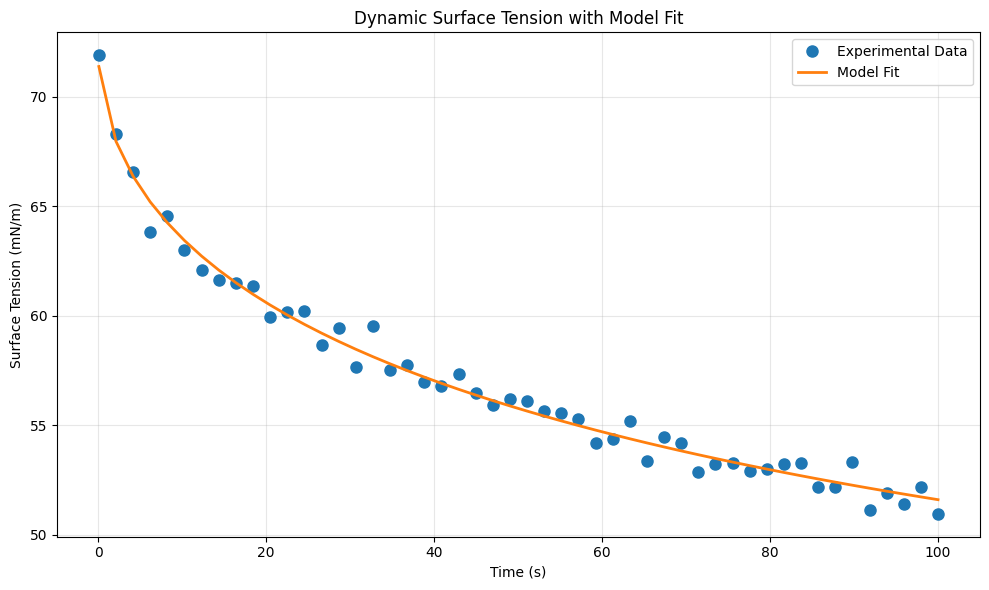

In [27]:
# Plot data with fit
pf.plot_data_with_fit(time, surface_tension_noisy, fitted_surface_tension,
                      title="Dynamic Surface Tension with Model Fit")

## Analyze Residuals

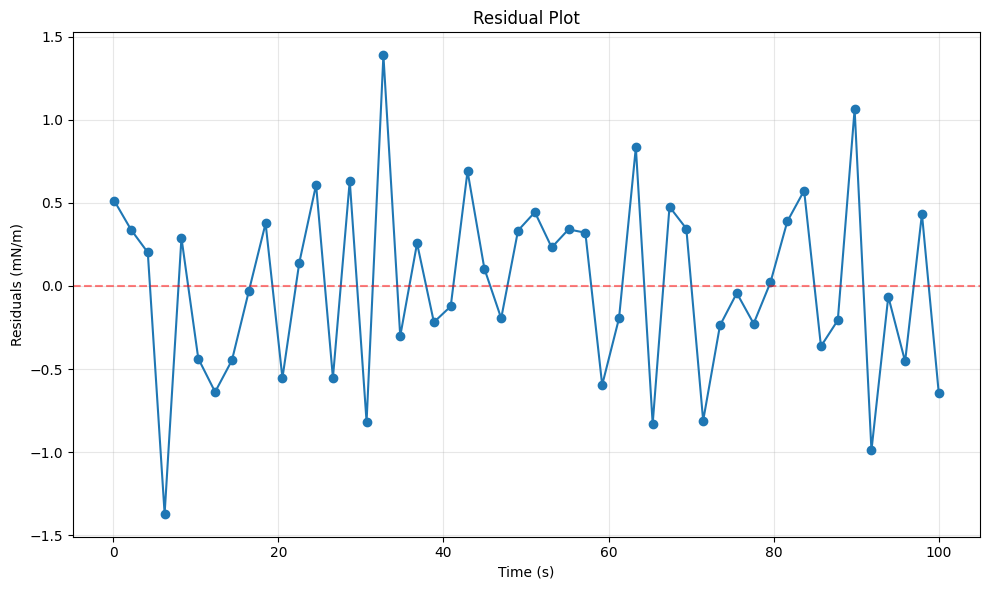

In [28]:
# Plot residuals
pf.residual_plot(time, surface_tension_noisy, fitted_surface_tension)

## Plot raw data and plot calibration data, save fit parameters

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mape3\AppData\Local\Temp\ipykernel_26596\1212987110.py:5: SyntaxWarning: invalid escape sequence '\C'
  calibration=pd.read_csv("Example Data\Calibration.csv", delimiter=",")
C:\Users\mape3\AppData\Local\Temp\ipykernel_26596\1212987110.py:5: SyntaxWarning: invalid escape sequence '\C'
  calibration=pd.read_csv("Example Data\Calibration.csv", delimiter=",")


NameError: name 'lifetime' is not defined

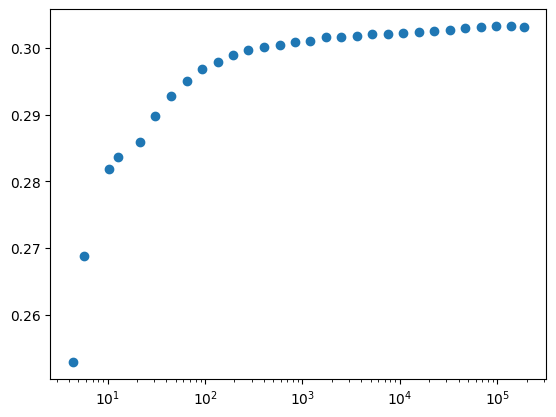

In [29]:
# Import data from txt file
import json
from scipy.optimize import curve_fit

calibration=pd.read_csv("Example Data\Calibration.csv", delimiter=",")

# Extract JSON metadata from column headers
calibrationmeta = {}
for col in calibration.columns:
    if '#' in col:
        # Split the column name at the '#' character
        col_name, json_data = col.split('#', 1)
        # Store the JSON data
        calibrationmeta[col_name] = json_data
        # Rename the column to remove JSON metadata
        calibration.rename(columns={col: col_name}, inplace=True)

# Plot calibration data
plt.plot(calibration["bubble life time[ms]2"], calibration["SFT"], 'o')
plt.xscale('log')
# Fit a exponential model to the log of lifetime vs SFT
def fractional_exponential(x, a, b, c):
    return a * np.exp(b * x) + c
popt, pcov = curve_fit(fractional_exponential, np.log(lifetime), calibration["SFT"], p0=(-0.1, -0.7, 0.5))
plt.plot(lifetime, fractional_exponential(np.log(lifetime), *popt), label='Fitted Curve')
plt.xlabel('Bubble Lifetime [ms]')
plt.ylabel('Capillary Diameter [mm]')
plt.legend()
popt

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\mape3\AppData\Local\Temp\ipykernel_26596\3126424618.py:1: SyntaxWarning: invalid escape sequence '\C'
  df=pd.read_csv("Example Data\C12E4_0.1g.txt", delimiter="\t", header=1, skiprows=[2])


,Oberflächenalter [ms],Max. Pressure 30,Oberflächenalter [ms].1,Min. Pressure 30,Oberflächenalter [ms].2,T1 30,Oberflächenalter [ms].3,T2 30,Oberflächenalter [ms].4,SFT 30,...,Oberflächenalter [ms].6,Filter 30,Oberflächenalter [ms].7,Max. Pressure 30.1,Oberflächenalter [ms].8,Min. Pressure 30.1,Oberflächenalter [ms].9,Surface age 30,Oberflächenalter [ms].10,SFT
0,0,"1,11957171709523",0,"0,367726929357821",0.0,"25,02",0.0,"23,07",0,"72,6952319907204",...,NaN,NaN,NaN,NaN,NaN,NaN,0,"10,5920005589724","99726,5548706055","29,2717931067555"
1,"0,051235","1,12113954508861","0,051235","0,367014280269918",1.0,"25,02",1.0,"23,08","0,051235","72,8367446709301",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,051235","10,712000541389","75405,4107666016","29,6597419949265"
2,"0,102123","1,12113954508861","0,102123","0,368011988992982",NaN,NaN,NaN,NaN,"0,102123","72,8027539924309",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,102123","10,5760004371405","91809,8983764648","28,6237769924085"
3,"0,15401","1,12128207490619","0,15401","0,371290174797335",NaN,NaN,NaN,NaN,"0,15401","72,864623210074",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,15401","10,7840001583099","74499,0600585938","29,3428656644134"
4,"0,204603","1,12113954508861","0,204603","0,369294757351207",NaN,NaN,NaN,NaN,"0,204603","72,808800547011",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,204603","10,6000006198883","29607,3589324951","31,8597291178053"
5,"0,254918","1,12113954508861","0,254918","0,369294757351207",NaN,NaN,NaN,NaN,"0,254918","72,808800547011",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,254918","10,6000006198883","34634,944152832","30,5784028576918"
6,"0,307031","1,12028436618313","0,307031","0,367726929357821",NaN,NaN,NaN,NaN,"0,307031","72,7297632122392",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,307031","10,5280000716448","25482,5253486633","31,4232967306667"
7,"0,356637","1,12156713454135","0,356637","0,369152227533627",NaN,NaN,NaN,NaN,"0,356637","72,7943752855387",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,356637","10,42400021106","18903,8512706757","32,008060978877"
8,"0,408368","1,12156713454135","0,408368","0,369152227533627",NaN,NaN,NaN,NaN,"0,408368","72,7943752855387",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,408368","10,42400021106","16444,3092346191","33,3507253429373"
9,"0,459262","1,12071195563587","0,459262","0,368724638080885",NaN,NaN,NaN,NaN,"0,459262","72,7169809121496",...,NaN,NaN,NaN,NaN,NaN,NaN,"0,459262","10,360000655055","5845,94571590424","46,8229573928726"


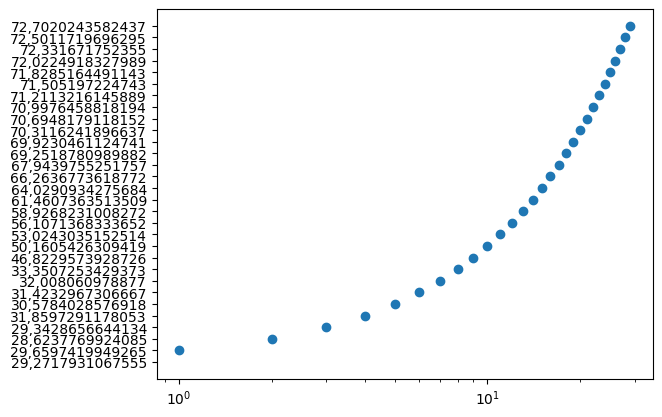

In [ ]:
df=pd.read_csv("Example Data\C12E4_0.1g.txt", delimiter="\t", header=1, skiprows=[2])
surfaceage=df["Oberflächenalter [ms].10"]
sft=df["SFT"]


## Notes

- Add more test cases as needed
- Test with real experimental data when available
- Validate numerical integration methods